<a href="https://colab.research.google.com/github/jarrydmartinx/generative-models/blob/master/variational-autoencoder-theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theory: Generative Models and Variational Autoencoders

## What are generative models?


The term is used in many ways, here it refers to any model that takes a training set $\mathbf{X} = \{\mathbf{x}^{(i)}\}^N_{i=1}$, consisting of samples $\mathbf{x}^{(i)}$ drawn from a 'true' distribution $p_{\text{data}}(\mathbf{x})$, and learns to represent an estimate of that distribution somehow. The result is a probability distribution $p_{\text{model}}(\mathbf{x})$. 

Different models do one or more of the following:
* Represent this distribution $p_{\text{model}}(\mathbf{x})$ explicitly.
* Allow the distribution $p_{\text{model}}(\mathbf{x})$, or some approximation to it, to be computed numerically, for any $\mathbf{x}$
* Allow generation of samples from the model distribution $p_{\text{model}}(\mathbf{x})$.

Spoiler: Variational Autoencoders do all three things.

Here lets restrict ourselves, following Goodfellow (2016), to generative models that work using the principle of maximum likelihood. Note that some of the models mentioned are often used with principles other than maximum likelihood.



### Maximum Likelihood and Generative Models
* The basic idea of maximum likelihood is to define a model that outputs an estimate of a probability distribution over the input space.
* We then refer to the **likelihood** as the probability that model assigns to the training data. For i.i.d data:
$$ \prod_{i}p_\text{model}(\mathbf{x}^{(i)};\mathbf{\theta})$$
* The **maximum likelihood principle** dictates that we choose the parameters $\theta$ that maximise this likelihood. This is easiest to do in log space; it simplifies the expressions and is more numerical stable. Hence:
$$ 
\mathbf{\theta}^* = \arg\max_\mathbf{\theta} \sum_i \log p_\text{model}(\mathbf{x}^{(i)};\mathbf{\theta})
$$
* We can **think of** maximum likelihood as minimising the **KL divergence** between the data generating distribution and the model:
$$
\mathbf{\theta}^* = \arg\min_\mathbf{\theta}D_{KL}\big( p_\text{data}(\mathbf{x}) \Vert p_\text{model}(\mathbf{x};\mathbf{\theta}) \big)
$$
  * If we had access to  $p_\text{data}(\mathbf{x})$, and it were a member of the family of distributions $ p_\text{model}(\mathbf{x};\mathbf{\theta}) $, then we would recover $p_\text{data}(\mathbf{x})$  exactly.
  * However, we don't have access to $p_\text{data}(\mathbf{x})$; instead, we only have $N$ samples from $p_\text{data}(\mathbf{x})$. 
* We define an **empirical distribution** $\hat{p}_\text{data}(\mathbf{x})$ that places mass only at these N points, approximating.
  * Minimising the KL divergence between the empirical distribution $\hat{p}_\text{data}(\mathbf{x})$ and  $p_\text{model}(\mathbf{x};\mathbf{\theta}) \big) $ is **exactly equivalent** to maximising the log likelihood of the training set.
  * The justifications for use of the KL (as the only divergence that is a reasonable measure of relative information) therefore provide some justification for the maximum likelihood principle.


### Taxonomy of Generative Models using Maximum Likelihood Principle
We can distinguish the way different generative models work by contrasting the ways they compute the likelihood and its gradients, or approximations to these quantities.


![texto alternativo](https://cdn-images-1.medium.com/max/800/1*otb47mG5KQWNh91prmyxzg.png)

## The VAE Generative Model $p_\text{model}(\mathbf{x};\theta)$


In the taxonomy above, VAEs are generative models that provide an explicit, but **intractable** density function.
* This avoids the disadvantages of designing models with tractable density functions (e.g. FVBNs above).
* However, we must resort to **approximation** to maximise the likelihood


### VAE Modelling Assumptions
Recall that we have a training set $\mathbf{X} = \{\mathbf{x}^{(i)}\}^N_{i=1}$, consisting of $N$ independent samples $\mathbf{x}^{(i)}$ of a random variable $x$ with density $p_\text{data}(\mathbf{x})$. The VAE model makes the following 3 assumptions about $p_\text{data}(\mathbf{x})$
1. Assume the data are generated by a random process involving an unobserved continuous random variable $\mathbf{z}$. Assume the process has two steps:
  * a value $\mathbf{z}^{(i)}$ is generated from some prior distribution $p_{\theta^*}(\mathbf{z})$, then
  * a value $\mathbf{x}^{(i)}$ is generated from some conditional distribution $p_{\theta^*}(\mathbf{x} \mid \mathbf{z})$
  
This amounts to assuming that, for a single sample $\mathbf{x}^{(i)}$:
  $$ p_\text{data}(\mathbf{x}^{(i)}) = \int p_{\theta^*}(\mathbf{x}^{(i)},\mathbf{z})dz = \int p_{\theta^*}(\mathbf{z})p_{\theta^*}(\mathbf{x}^{(i)}|\mathbf{z}) dz
  $$



3. Assume their pdfs are differentiable in $\theta$ and $z$ almost everywhere

### The VAE Model of the Marginal Likelihood $p_\text{model}(\mathbf{x}^{(i)};\theta)$
The VAE model introduces latent variables and expresses the marginal likelihood of observed variables as an expectation over the latent variables.
$$
\boxed{p_\text{model}(\mathbf{x}^{(i)};\theta) = \int p_\theta(\mathbf{x}^{(i)},\mathbf{z})dz = \int p_\theta(\mathbf{z})p_\theta(\mathbf{x}|\mathbf{z}) dz}
$$
The true parameters $\theta^*$ and the values of the latent variables $z$ are unknown to us

### What assumptions did we NOT make?
Note that we do **not** make the common assumptions necessary to make the following tractable:
  * The model marginal likelihood $p_\text{model}(\mathbf{x};\theta)$
  * The model posterior $p_\theta(\mathbf{z} \mid \mathbf{x})$. Note that intractibility precludes the use of the EM algorithm.
 
In general, these are not tractable. Note that these intractabilities are quite common, and appear in the case of even moderately complicated likelihood functions $p_{\theta}(\mathbf{x}|\mathbf{z})$ , e.g. a neural network with one nonlinear hidden layer. 





### Intractability of the Model Marginal Likelihood $p_\text{model}(\mathbf{x};\theta)$
* To find the optimal parameters $\theta^*$ by maximum likelihood, we must compute an estimate of the marginal likelihood for each training sample $\mathbf{x}^{(i)}$.
* However, **we cannot in general evaluate the marginal likelihood $p_\text{model}(\mathbf{x};\theta)$ exactly**. We can of course simulate the data generating process:
  1. Sample a value from the prior, to get $z^{(i)} \sim p_\theta(z)$
  2. Compute the likelihood $p_\theta(x|z^{(i)})$ using the decoder.
  3. As the number of samples $\to\infty$, the sample mean of the likelihood approaches $p_\text{model}(\mathbf{x};\theta)$
  
  As we mentioned, this is not tractable in general. If p(x|z) is small for most $z$ drawn from the prior, it will take a large number of samples to get an accurate estimate (i.e. to include enough samples where p(x|z) is large).
* Instead of computing this directly, the VAE approach is to compute a lower bound on $\log p_\text{model}(\mathbf{x};\theta)$.
* Note also that sampling-based solutions like Monte-Carlo EM would be too slow for large datasets where we want to make parameter updates using small minibatches or even single datapoints. This is because it typically involves an expensive sampling loop per datapoint.

### The Variational Lower Bound  $\mathcal{L}(\theta, \phi; \mathbf{x}^{(i)})$ on the Marginal Log-Likelihood $\log p_\text{model}(\mathbf{\mathbf{x}^{(i)}};\theta)$


The marginal log-likelihood under our model for a single training sample $\mathbf{x}^{(i)}$ can be rewritten as:
\begin{align}
\log p(\mathbf{x}^{(i)}; \mathbf{\theta}) \quad
&= \quad \mathbb{E}_{q(z|x)}\left[\log p_\theta(\mathbf{x}^{(i)})\right] \\
&= \quad \mathbb{E}_{q(z|x)}\left[\log \frac{p_\theta(\mathbf{x}^{(i)},\mathbf{z})}{p_\theta(\mathbf{z}\mid \mathbf{x}^{(i)})}\right] \\
&= \quad \mathbb{E}_{q(z|\mathbf{x})}\left[\log \frac{p_\theta(\mathbf{x}^{(i)}, \mathbf{z})\ q_\phi(\mathbf{z} \mid \mathbf{x}^{(i)})}{q_\phi(\mathbf{z} \mid \mathbf{x}^{(i)})\ p_\theta(\mathbf{z}\mid \mathbf{x}^{(i)})} \right]\\
&= \quad \mathbb{E}_{q(z|\mathbf{x})}\left[\log \frac{p_\theta(\mathbf{x}^{(i)},\mathbf{z})}{q_\phi(\mathbf{z} \mid \mathbf{x}^{(i)})} + \log \frac{q_\phi(\mathbf{z} \mid \mathbf{x}^{(i)})}{p_\theta(\mathbf{z}\mid \mathbf{x}^{(i)})}\right]\\
&= \quad \mathbb{E}_{q(\mathbf{z}|\mathbf{x})}\left[\log \frac{p_\theta(\mathbf{x}^{(i)}, \mathbf{z})}{q_\phi(\mathbf{z} \mid \mathbf{x}^{(i)})}\right] +  \mathbb{E}_{q(z|\mathbf{x})}\left[\log \frac{q_\phi(\mathbf{z} \mid \mathbf{x}^{(i)})}{ p_\theta(\mathbf{z}\mid \mathbf{x}^{(i)})}\right] \\
&= \underbrace{\mathcal{L}(\theta, \phi ; \mathbf{x}^{(i)})}_\text{Var. lower bound on marg. log-likelihood of $\mathbf{x}^{(i)}$} + \qquad   \underbrace{D_{KL} (q_\phi(z \mid \mathbf{x}^{(i)}) \Vert p_\theta(\mathbf{z}\mid \mathbf{x}^{(i)}))}_\text{KL bw approximate and 'true' model posterior ($\theta$-dependent)} 
\end{align}

We can write the evidence lower bound (ELBO) as:
\begin{align}
\log p_\theta(\mathbf{x}^{(i)}) 
&\geq \quad \mathcal{L}(\theta, \phi; \mathbf{x}^{(i)}) \\
&= \quad \mathbb{E}_{q(z\mid\mathbf{x}^{(i)})}\left[\log \frac{p(\mathbf{x}^{(i)}, z)}{q(z|\mathbf{x}^{(i)})}\right] \\
&= \quad \mathbb{E}_{q_\phi (z\mid \mathbf{x}^{(i)})}\big\{\log p_\theta (\mathbf{x}^{(i)}, z) -\log q_\phi (z \mid \mathbf{x}^{(i)}) \big\} \\
&= \quad \underbrace{\mathbb{E}_{q_\phi (z\mid \mathbf{x}^{(i)})}\big\{\log p_\theta (\mathbf{x}^{(i)}, z) \big\}}_\text{Exp. complete data log-likelihood} \qquad +  \underbrace{H(q_\phi (z\mid \mathbf{x}^{(i)}))}_\text{Entropy of approx. posterior $q$}\\
\end{align}


For our purposes, we will rewrite this equation in a form that best reflects the way VAEs compute an estimate of the (negative) ELBO:
\begin{align}
\boxed{- \mathcal{L}(\theta, \phi; x^{(i)}) = \qquad \underbrace{- \mathbb{E}_{q_\phi(z \mid x^{(i)})} \big\{\log p_\theta (x^{(i)}\mid z) \big\}}_\text{exp'd recontruction error}  \qquad + \underbrace{D_{KL}(q_\phi (z\mid x^{(i)}) \Vert p_\theta(z))}_{\text{regularizes $\phi$ so approx. posterior $q_\phi$ is close to prior $p_\theta$}}}
\end{align}

(it's nice because it's equivalent to maximising the expectation pictured above, but with respect to q(z|x) instead of p(z), with a KL correction term which penalises how far q(z|x) is from p(z))




![texto alternativo](https://pbs.twimg.com/media/C31GCqdWEAA_xVm.jpg =300x)

### Estimating the ELBO $\mathcal{L}(\theta, \phi; x^{(i)})$ and its gradients
* VAEs train by maximizing the evidence lower bound (ELBO) on the marginal log-likelihood, which is an expectation taken against $q_\phi (z'\mid x)$. In practice we often only compute the single sample Monte Carlo estimate of this expectation:
\begin{align}
&\mathbb{E}_{q_\phi (\mathbf{z}^{(i)}\mid \mathbf{x}^{(i)})}\big\{\log p_\theta (\mathbf{x}^{(i)}, \mathbf{z}^{(i)}) -\log q_\phi (\mathbf{z}^{(i)} \mid \mathbf{x}^{(i)}) \big\} \\
\approx \quad &\frac{1}{L}\sum_{l = 1}^{L} \log p_\theta (\mathbf{z}^{(i,l)}) + \log p_\theta (\mathbf{x}^{(i)} \mid \mathbf{z}^{(i,l)}) - \log q_\phi (\mathbf{z}^{(i,l)} \mid \mathbf{x}^{(i)}) \qquad \mathbf{z}^{(i,l)}  \sim q_\phi (\mathbf{z}\mid \mathbf{x}^{(i)}) \\
\approx \quad &\log p_\theta (\mathbf{z}^{(i,l)}) + \log p_\theta (\mathbf{x}^{(i)} \mid \mathbf{\mathbf{z}}^{(i,l)}) - \log q_\phi (\mathbf{z}^{(i,l)} \mid \mathbf{x}^{(i)}) \qquad \mathbf{z}^{(i,l)}  \sim q_\phi (\mathbf{z} \mid \mathbf{x}^{(i)})
\end{align}

If the KL term can be integrated analytically, we need only compute an estimate of the expected reconstruction error.
  * The single sample Monte Carlo estimate of the expected reconstruction error is:
$$\log p(\mathbf{x}^{(i)}| z') \qquad z'\sim q_{\phi}(z|\mathbf{x}^{(i)})$$

### How do we sample from $q_{\phi}(z|\mathbf{x}^{(i)})$




![texto alternativo](https://jaan.io/images/encoder-decoder.png =350x)


## Using a VAE as a Generative Model

**THE NOISE VARAIBLE HAS NOTHING TO DO WITH THE PRIOR OVER THE LATENT VARIABLES**

We'll discuss two ways in which we can use a trained VAE as a generative model: computing estimates of likelihoods, and sampling.
###  Compute an estimate of the Marginal Likelihood $p_\text{model}(\mathbf{x})$ 

* As mentioned, we can't compute our model likelihood exactly, as $
p_\text{model}(\mathbf{x}^{(i)};\theta) = \int p_\theta(\mathbf{x}^{(i)},\mathbf{z})dz = \int p_\theta(\mathbf{z})p_\theta(\mathbf{x}|\mathbf{z}) dz $ is intractable in general.
* However, we can compute the **ELBO** as an **approximation to $p_\text{model}(\mathbf{x})$**, for any $x$, by the following procedure:
  * Pass x into the encoder to get the parameters of the distribution q(z\mid x).
  * 

  1. Pass our 

The quality of this approximation is only limited by the quality of our approximation to the posterior
### Sample from $p_\text{model}(\mathbf{x}^{(i)};\theta) = p_\theta(z) p_\theta(x\mid z)$
  1. Sample a value from the prior, to get $z^{(i)} \sim p_\theta(z)$
  2. Sample a value from the conditional distribution $p_\theta(x|z^{(i)})$ output by the decoder
  3. As the number of samples $\to\infty$, the sample mean approaches $p_\text{model}(\mathbf{x};\theta)$


TO SUMMARIZE:

Two ways to use VAE as an approximate generative model of p(x):
1. evaluate the expectation below by sampling from the prior and likelihood
*expectation above
2. evaluate the ELBO to lower bound p(x), by sampling from the variational approximation q(z|x) (encoder)
NOW PART II
Sampling: 
is just what you said.
you just 
1.sample values in the latent space, according to the prior,
2. pipe that value through the decoder to get parameters for your p(x|z) decoder distribution
3. sample from that p(x|z) and that does give you a sample distributed according to p(x)
DONE

And my confusion before, regarding the fact that this shouldn't work since we're sampling from p(z), and the decoder is trained to decode values from q(z|x), was just a confusion about the fact that our decoder was trained using a variational approximation. sampling from the prior would be perfect if our approximation to the posterior p(z|x) was perfect.

In [0]:
! pip install -q dm-sonnet
! pip install -q plotnine

In [0]:
import numpy as np
import pandas as pd
# import plotnine as gg
import sonnet as snt
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
from __future__ import absolute_import, division, print_function

# to generate gifs
# !pip install tf-nightly-2.0-preview
import tensorflow as tf
!pip install imageio

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio

from IPython import display

In [0]:
import matplotlib.pyplot as plt

In [0]:
#@title TODO
class Encoder(snt.AbstractModule):
  
  def __init__(self, latent_size: int):
    super(self).__init__(name='encoder')
    pass
  
  def _build(self, inputs: tf.Tensor):
    pass

## Examples

In [0]:
initial_state = tf.get_variable(name='weight', shape=(16,), dtype=tf.float32, initializer=tf.initializers.truncated_normal(), trainable=False)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# with tf.variable_scope('sickone'):
#   y = tf.random_normal(shape=(16,), name='latent')

In [0]:
# with tf.Session() as sess:
#   sess.run(tf.global_variables_initializer())
#   result = sess.run(x)
#   state_result = sess.run(initial_state)
#   print()
#   print('result: {}'.format(result))
#   print('state: {}'.format(state_result))
#   print('state: {}'.format(state_result))
#   print('y sample: {}'.format(sess.run(y)))
#   print('y sample: {}'.format(sess.run(y)))

## Make a simple conv

In [0]:
# Reset the motherfucking graph.
tf.reset_default_graph()

# Make a convolutional layer consisting of 32 independent filters.
conv_module = snt.Conv2D(output_channels=32, kernel_shape=(5, 5), stride=(2, 2))

# Make some dummy (noise) inputs.
inputs = tf.random_normal(shape=(1, 84, 84, 3))  # [N, H, W, C]

# Pass the noise through our conv filters.
filtered_image = conv_module(inputs)

In [0]:
tf.global_variables()

[<tf.Variable 'conv_2d/w:0' shape=(5, 5, 3, 32) dtype=float32_ref>,
 <tf.Variable 'conv_2d/b:0' shape=(32,) dtype=float32_ref>]

In [0]:
filtered_image

<tf.Tensor 'conv_2d/BiasAdd:0' shape=(1, 42, 42, 32) dtype=float32>

In [0]:
with tf.train.MonitoredSession() as sess:
  input_v = sess.run(inputs)  # Get some noise inputs out of TF
  output_v = sess.run(filtered_image)  # Get our filtered image out (NOTE: not the *same* image as above)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [0]:
input_v.shape

(1, 84, 84, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


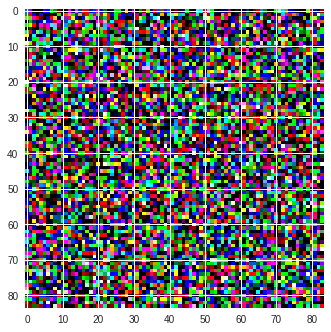

In [0]:
plt.imshow(input_v.squeeze())

In [0]:
output_v.shape

(1, 42, 42, 32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


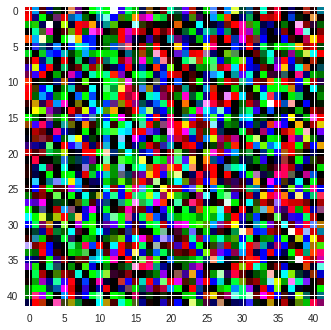

In [0]:
plt.imshow(output_v.squeeze()[:, :, :3])

## Make an MLP Encoder/Decoder



In [0]:
(train_images, _), (test_images, _) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

# Normalizing the images to the range of [0., 1.]
train_images /= 255.
test_images /= 255.

# Binarization
train_images[train_images >= .5] = 1.
train_images[train_images < .5] = 0.
test_images[test_images >= .5] = 1.
test_images[test_images < .5] = 0.

In [0]:
#@title EncoderMLP

class EncoderGaussMLP(snt.AbstractModule):
  
  def __init__(self):
    super().__init__(name='encoder')
  
    self._mlp = snt.nets.MLP(output_sizes=[500, 100], 
                             activation=tf.nn.tanh,
                             activate_final=True)

    self._mu_layer = snt.Linear(output_size=N_LATENT)

    self._log_var_layer = snt.Linear(output_size=N_LATENT)
  
  def _build(self, input_images: tf.Tensor):
    flat_image = snt.BatchFlatten()(input_images)
    
    encoding = self._mlp(flat_image)
    
    mu = self._mu_layer(encoding)
    
    log_variance = self._log_var_layer(encoding)
    
    return latent_mu, latent_log_var
  


In [0]:
#@title DecoderBernMLP

class DecoderBernMLP(snt.AbstractModule):
  
  def __init__(self):
    super().__init__(name='decoder')

    self._mlp = snt.nets.MLP(output_sizes=[100, 500], 
                             activation=tf.nn.tanh,
                             activate_final=True)
    
    self._theta_layer = snt.Linear(output_size=N_OBSERVED)
        
  def _build(self, latent: tf.Tensor, apply_sigmoid=False):
    
    decoding = self._mlp(latent)
        
    logits = self._theta_layer(decoding)
    
    if apply_sigmoid == True:
      return tf.sigmoid(logits)
    
    return logits

In [0]:
class VAE(snt.AbstractModule):
  def __init__(self, 
               encoder: EncoderMLP, 
               decoder: DecoderMLP):
    super().__init__(name='vae')
    
    self._encoder = encoder
    self._decoder = decoder
  
  def _build(self, input_images:tf.Tensor):  
    
    latent_mu, latent_log_var = self._encoder(input_images)
    latent_sample = self._sample_latent_z(latent_mu, latent_log_var)
    logits = self._decoder(latent_sample)
    
    return logits, latent_mu, latent_log_var
  
  def _sample_latent_z(self, mean, logvar, noise=None): # Produce a sample in the latent space
    if noise == None:
      noise = tf.random.normal(shape=mean.shape)
    return noise * tf.exp(logvar * .5) + mean
    
  def generate_sample_x(self, noise = None): # Produce a sample in the input space
    self._sample_latent_z(
    return self._decoder.() 
  
  

In [0]:
N_TRAINING_STEPS = 6000
N_LATENT = 2
N_OBSERVED = 784
BATCH_SIZE = 128
N_TRAINING_SAMPLES = train_images.shape[0]

In [0]:
#@title Build the Graph

encoder = EncoderMLP()
decoder = DecoderBernMLP()

vae = VAE(encoder, decoder)

input_batch = tf.placeholder(tf.float32, shape=(BATCH_SIZE, 28, 28))

theta, latent_mu, latent_log_var = vae(input_batch)



In [0]:
#@title Build the Graph

tf.reset_default_graph()

input_batch = tf.placeholder(tf.float32, shape=(BATCH_SIZE, 28, 28))
    
encoder = EncoderMLP()
decoder = DecoderMLP()


# Encode the inputs into the latent space
latent_mu, latent_log_var, flat_image, encoding = encoder(input_batch)

# Sample from the posterior over the latents
noise = tf.random_normal(shape=[N_LATENT])

latent = latent_mu + noise * latent_log_var

test_mu = decoder(latent_mu)

# Decode the sample latents into the input space
dec_mu = decoder(latent)

# Compute the Reconstruction Loss term

flat_input = snt.BatchFlatten()(input_batch)  # [B, HW]

# recon loss for binarized data is just binary cross-entropy
recon_loss = - (flat_input * tf.log(dec_mu + 1e-15) 
                + (1 - flat_input) * tf.log(1-dec_mu + 1e-15))  # [B, HW]

recon_loss = tf.reduce_sum(recon_loss, axis=-1)  # [B]  (sum -log likelihoods)
recon_loss = tf.reduce_mean(recon_loss)  # []  (reduce mean over batch)

# Compute the KL Loss term
latent_variance = tf.exp(latent_log_var)  # [B, L]

kl_loss = 0.5 * (latent_variance + latent_mu**2 - latent_log_var - 1)  # [B, L]
kl_loss = tf.reduce_sum(kl_loss, axis=-1)  # [B]
kl_loss = tf.reduce_mean(kl_loss)  # []

# Combine the loss terms
loss = recon_loss + kl_loss  # []

# Pick an optimizer and add the minimizer op to the graph
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4)
sgd_op = optimizer.minimize(loss)

In [0]:
# Run the Graph

fetches = {
           'sgd_op': sgd_op,
           'loss': loss,
            'dec_mu': tf.reduce_sum(dec_mu),
           #'latent': latent,
#            'dec_mu': tf.reduce_mean(dec_mu),
#            'test_mu': test_mu,
#            'recon_a': tf.reduce_sum(tf.log(dec_var)),
#            'recon_b': tf.reduce_sum(sq_error / dec_var),
           'recon_loss': recon_loss,
           'kl_loss': kl_loss,
    'test_mu': test_mu,
    'input_batch': input_batch,
          }
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(N_TRAINING_STEPS):

  batch_indexes = np.random.choice(N_TRAINING_SAMPLES, BATCH_SIZE)
  mini_batch = train_images[batch_indexes,:,:].astype(np.float32).squeeze(axis=-1)
  np_outputs = sess.run(fetches, feed_dict={input_batch: mini_batch})

  if step % (N_TRAINING_STEPS // 50) == 0:
    truth = np_outputs.pop('input_batch')
    reconstructed = np_outputs.pop('test_mu')
    print(np_outputs)
#       print('Step: {}, Loss: {}, Recon. Loss: {}, kl_loss: {}'.format(step,
#           np_outputs['loss'], np_outputs['recon_loss'], np_outputs['kl_loss']))


{'sgd_op': None, 'loss': 549.42267, 'dec_mu': 50126.703, 'recon_loss': 549.25494, 'kl_loss': 0.16769901}
{'sgd_op': None, 'loss': 333.0927, 'dec_mu': 33150.875, 'recon_loss': 329.27692, 'kl_loss': 3.815787}
{'sgd_op': None, 'loss': 289.15002, 'dec_mu': 33925.945, 'recon_loss': 286.43164, 'kl_loss': 2.7183986}
{'sgd_op': None, 'loss': 284.25897, 'dec_mu': 33138.355, 'recon_loss': 282.51556, 'kl_loss': 1.7434018}
{'sgd_op': None, 'loss': 264.55307, 'dec_mu': 30248.844, 'recon_loss': 262.60864, 'kl_loss': 1.9444281}
{'sgd_op': None, 'loss': 265.0794, 'dec_mu': 31521.232, 'recon_loss': 263.21985, 'kl_loss': 1.8595575}
{'sgd_op': None, 'loss': 240.96706, 'dec_mu': 29871.453, 'recon_loss': 238.70335, 'kl_loss': 2.2636983}
{'sgd_op': None, 'loss': 235.00769, 'dec_mu': 32276.723, 'recon_loss': 232.49045, 'kl_loss': 2.5172422}
{'sgd_op': None, 'loss': 234.04305, 'dec_mu': 32867.707, 'recon_loss': 231.61987, 'kl_loss': 2.4231744}
{'sgd_op': None, 'loss': 242.2762, 'dec_mu': 32558.883, 'recon_los

In [0]:
x = np.linspace(-3, 3, num=5)
y = np.linspace(-3, 3, num=5)

In [0]:
 np.sort(np.random.randn(25, 2), axis=0).astype(np.float32)

array([[-1.6110584 , -2.3263366 ],
       [-1.4989392 , -1.9535222 ],
       [-1.416607  , -1.9180276 ],
       [-1.2709504 , -1.4216558 ],
       [-1.1695166 , -1.3741621 ],
       [-0.94293964, -1.2163731 ],
       [-0.79104453, -1.1193346 ],
       [-0.68776935, -0.9141928 ],
       [-0.4738726 ,  0.06631131],
       [-0.45178416,  0.11228297],
       [-0.4474064 ,  0.11814801],
       [-0.4464775 ,  0.15939535],
       [-0.37798703,  0.27463874],
       [-0.18666294,  0.34359834],
       [ 0.1594285 ,  0.5146453 ],
       [ 0.22617787,  0.52469444],
       [ 0.22908174,  0.617307  ],
       [ 0.23722091,  0.65636265],
       [ 0.3232248 ,  0.8523616 ],
       [ 0.33665165,  0.9091204 ],
       [ 0.44892156,  0.91362834],
       [ 1.3943167 ,  0.96468204],
       [ 1.5853802 ,  1.435113  ],
       [ 1.712998  ,  1.5947464 ],
       [ 1.9626383 ,  1.7867622 ]], dtype=float32)

In [0]:
budge_latent_traversal = 3 * np.sort(np.random.randn(25, 2), axis=0).astype(np.float32)
budge_latent_traversal[:,1] = np.zeros(25)
budge_latent_traversal = tf.convert_to_tensor(budge_latent_traversal)

In [0]:
traversals = decoder(budge_latent_traversal)

In [0]:
sik1 = sess.run(traversals)

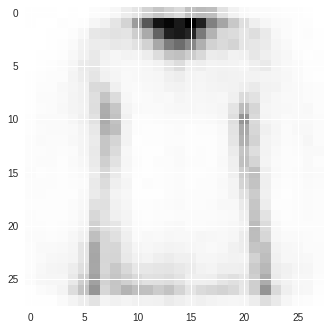

In [0]:
plt.imshow(np.reshape(sik1[13], (28, 28)))

In [0]:
yy.shape

(50, 50)

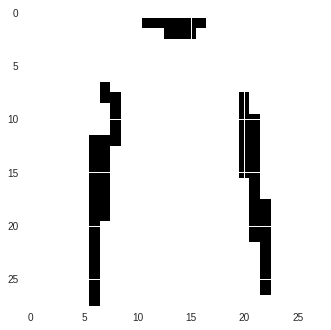

In [0]:
plt.imshow(truth[6])

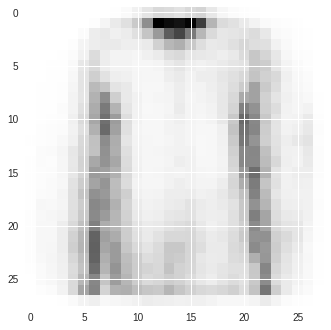

In [0]:
plt.imshow(np.reshape(reconstructed[6], (28, 28)))

In [0]:
#@title Test the reconstructions
  
batch_indices = np.random.choice(N_TRAINING_SAMPLES, BATCH_SIZE)
training_samples = train_images[batch_indices,:,:]
plt.imshow(training_samples[1,:,:])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


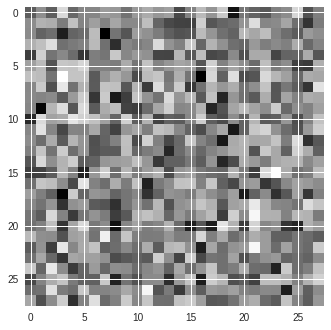

In [0]:
with tf.train.MonitoredSession() as sess:

  reconst_vectors = sess.run(test_mu, feed_dict={input_batch: training_samples})

  reconst_image = np.reshape(reconst_vectors[1,:], (28,28))
  plt.imshow(reconst_image)

In [0]:
#@title Ignore this

def log_normal_pdf(sample, mean, logvar, raxis=1):
  log_2pi = N_OBSERVED * tf.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean)**2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)

def compute_loss(sample, mean, logvar
  

## Making a convnet encoder

In [0]:
class Encoder(snt.AbstractModule):
  
  def __init__(self):
    # TODO(jaslanides) lol this is bullshit ay
    super().__init__(name='encoder')
    
    self._conv_net = snt.nets.ConvNet2D(output_channels=[32, 16, 8], 
                                        kernel_shapes=[5, 3, 3],
                                        strides=[2, 2, 1], 
                                        paddings=['SAME'])
    
    self._mlp = snt.nets.MLP(output_sizes=[50, 50])
    
    self._mu_layer = snt.Linear(output_size=N_LATENT)
    
    self._sigma_layer = snt.Linear(output_size=N_LATENT)
    
  def _build(self, input_image: tf.Tensor):  # Think of this as __call__ :)
    filtered_image = self._conv_net(input_image)
    flat_image = snt.BatchFlatten()(filtered_image)
    
    embedding = self._mlp(flat_image)
    
    mu = self._mu_layer(embedding)  # [N_LATENT]
    sigma = self._sigma_layer(embedding)
    
    return mu, sigma

In [0]:
class Decoder(snt.AbstractModule):
  
  def __init__(self):
    super().__init__(name='decoder')

    self._deconv_net = snt.nets.ConvNet2D(output_channels=[32, 16, 8], 
                                        kernel_shapes=[5, 3, 3],
                                        strides=[2, 2, 1], 
                                        paddings=['SAME']).transpose()    
   
    self._mlp = snt.nets.MLP(output_sizes=[50, 3528])
    
    
  def _build(self, latent: tf.Tensor):
    embedding = self._mlp(latent)
    
    filtered_image = tf.reshape(embedding, [1,21,21,8])
    
    output = self._deconv_net(filtered_image)
    
    return outputlatent_variance

In [0]:
tf.global_variables()

[<tf.Variable 'mlp/linear_0/w:0' shape=(784, 50) dtype=float32_ref>,
 <tf.Variable 'mlp/linear_0/b:0' shape=(50,) dtype=float32_ref>,
 <tf.Variable 'linear/w:0' shape=(50, 16) dtype=float32_ref>,
 <tf.Variable 'linear/b:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'linear_1/w:0' shape=(50, 16) dtype=float32_ref>,
 <tf.Variable 'linear_1/b:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'mlp_1/linear_0/w:0' shape=(16, 50) dtype=float32_ref>,
 <tf.Variable 'mlp_1/linear_0/b:0' shape=(50,) dtype=float32_ref>,
 <tf.Variable 'linear_2/w:0' shape=(50, 784) dtype=float32_ref>,
 <tf.Variable 'linear_2/b:0' shape=(784,) dtype=float32_ref>,
 <tf.Variable 'linear_3/w:0' shape=(50, 784) dtype=float32_ref>,
 <tf.Variable 'linear_3/b:0' shape=(784,) dtype=float32_ref>,
 <tf.Variable 'beta1_power:0' shape=() dtype=float32_ref>,
 <tf.Variable 'beta2_power:0' shape=() dtype=float32_ref>,
 <tf.Variable 'mlp/linear_0/w/Adam:0' shape=(784, 50) dtype=float32_ref>,
 <tf.Variable 'mlp/linear_0/w/Adam_1:

In [0]:
tf.reset_default_graph()

In [0]:
tf.reset_default_graph()

inputs = tf.random_normal(shape=(1, 84, 84, 3))  # [N, H, W, C]

encoder = Encoder()
decoder = Decoder()

latent_mu, latent_sigma = encoder(inputs)

noise = tf.random_normal(shape=[N_LATENT])

latent = latent_mu + noise * latent_sigma  # sik1

output = decoder(latent)

reconstruction_loss = tf.square(inputs - ae_output)

# TODO(jarryd): Figrue out the closed form

kl_loss = 0.5 * (latent_sigma^2 + latent_mu^2 - tf.log(latent_sigma^2) - 1)

loss = reconstruction_loss + kl_loss  # + for sure


optimizer = tf.train.AdamOptimizer(learning_rate=1e-4)

sgd_op = optimizer.minimize(loss)


with tf.train.MonitoredSession() as sess:
  for step in range(N_TRAINING_STEPS):
    sess.run(sgd_op)
    
  # Profit here.

In [0]:
# @title examples

# tf.reset_default_graph()

# conv_net = snt.nets.ConvNet2D(output_channels=[32, 16, 8], kernel_shapes=[5, 3, 3], strides=[2, 2, 1], paddings=['SAME'])

# mlp = snt.nets.MLP(output_sizes=[50, 50, N_LATENT])

# inputs = tf.random_normal(shape=(1, 84, 84, 3))  # [N, H, W, C]

## The Classical Variational Inference Recipe

1. Pick a model $p(x,z)$
2. Pick a variational approximation $q(z;\phi)$
3. Write down the objective (the ELBO):
$$ 
\mathcal{L}(\phi) = \mathbb{E}_{q(z;\phi)} \big[ \log p(x,z) - \log q(z;\phi) \big]
$$
4. Take the expectation
  * We need to take the expectation in order to make the dependence on the variational parameters $\phi$ explicit, in order to take gradients in $\phi$ to optimise
5. Compute the gradient $\nabla_\phi \mathcal{L}$
6. Optimise: take a gradient step $\phi^{\tau + 1} = \phi^{\tau} + \alpha\nabla_\phi\mathcal{L}$

### The problem with the recipe and the solution
* Problem: Step 4. **We often can't take this expectation analytically**.
  * Therefore we can't make the dependence on the variational parameters explicit.
  * Therefore we can't take the gradient. We could evaluate it by sampling and use non-gradient methods, but very inefficient.
  
### The Solution: push the gradient inside the expectation
* Let's try to switch the order of steps 4 and 5.
* We want to apply the gradient operator $\nabla_\phi\mathcal{L}$ before we take the expectation in $\mathcal{L}(\phi) = \mathbb{E}_{q(z;\phi)} \big[ \log p(x,z) - \log q(z;\phi) \big]$
* We need a general way to take gradients of expectations
* Then we use stochastic optimisation to take the expectation and profit.

### Computing Gradients of Expectations
Let $g(z,\phi) =  \log p(x,z) - \log q(z;\phi)$ so that we can rewrite $\mathcal{L}(\phi) $ more simply
\begin{align}
\mathcal{L}(\phi) 
&= \mathbb{E}_{q(z;\phi)} \big[ \log p(x,z) - \log q(z;\phi) \big] = \mathbb{E}_{q(z;\phi)} \big[g(z,\phi)\big] 
\end{align}
Now we will derive a new expression for the gradient of the ELBO by pushing the gradient operator inside the expectation:
\begin{align}
\nabla_\phi\mathcal{L} 
&=\nabla_\phi  \int q(z;\phi) g(z, \phi)dz \\
&=\int \big(\nabla_\phi q(z;\phi)\big)g(z, \phi) + q(z;\phi)\big(\nabla_\phi g(z, \phi)\big) dz \\
&=\int \big(q(z;\phi)\nabla_\phi \log q(z;\phi)\big)g(z, \phi) + q(z;\phi)\big(\nabla_\phi g(z, \phi)\big) dz\\
&=\int q(z;\phi)  \big(\nabla_\phi \log\{q(z;\phi)\}g(z, \phi) +\nabla_\phi g(z, \phi)\big) dz \\
&=\mathbb{E}_{q(z;\phi)}\big[\nabla_\phi \log\{q(z;\phi)\}g(z, \phi) +\nabla_\phi g(z, \phi)\big]
\end{align}
Things to note:
*  we have used the log-derivative trick: $\nabla_\phi \log q = \frac{\nabla_\phi q}{q}$
* we have been able to introduce the density $q$ into both terms.
  * q is a distribution we know and can sample from
  * Once an expectation is in terms of a distribution i can sample from, i can use Monte Carlo to construct noisy unbiased gradients
  

## The score function estimator

### The score function
The score function $\nabla_\phi  \log q(z;\phi) $ is a statistical measure of how sensitive a likelihood function is to its parameters. It's expectation $\mathbb{E}_{q(z;\phi)}\big[\nabla_\phi \log q(z;\phi)\big] = 0$.

### Rewriting the ELBO with the score function
Now recall the expression for the gradient of the ELBO derived above:
\begin{align}
\nabla_\phi\mathcal{L}
&= \mathbb{E}_{q(z;\phi)}\big[\nabla_\phi \log\{q(z;\phi)\}g(z, \phi) + \nabla_\phi g(z, \phi)\big]\\
&=  \mathbb{E}_{q(z;\phi)}\big[\nabla_\phi \log\{q(z;\phi)\}g(z, \phi)\big] +  \mathbb{E}_{q(z;\phi)}\big[\nabla_\phi g(z, \phi)\big]
\end{align}
Expanding the right hand term:
\begin{align}
\nabla_\phi g(z, \phi)
&= \mathbb{E}_{q(z;\phi)}\big[\nabla_\phi \big(  \log p(x,z) - \log q(z;\phi) \big)\big] \\
&= \mathbb{E}_{q(z;\phi)}\big[ \nabla_\phi \big(- \log q(z;\phi) \big) \big]\\
&=  - \mathbb{E}_{q(z;\phi)}\big[\nabla_\phi \log q(z;\phi)\big] = 0
\end{align}

Hence we can rewrite the gradient of the ELBO as:
\begin{align}
\nabla_\phi\mathcal{L}= \quad &\mathbb{E}_{q(z;\phi)}\big[\nabla_\phi \log\{q(z;\phi)\}g(z, \phi)\big]\\
= \quad &\mathbb{E}_{q(z;\phi)}\big[\nabla_\phi \log\{q(z;\phi)\} \big(\log p(x,z) - \log q(z;\phi)\big) \big] \\
\approx \quad &\frac{1}{L}\sum_{l=1}^L \nabla_\phi \log\{q(z^{(l)};\phi)\} \big(\log p(x,z^{(l)}) - \log q(z^{(l)};\phi) \big) \qquad z^{(i)} \sim q(z;\phi)
\end{align}

This is the score function estimator. It is also called the likelihood ratio (from Monte Carlo literature), or REINFORCE gradient.


### The Problem with the Score Function Estimator: High Variance
The variance of the noisy unbiased gradients produced by the score function estimator can be a problem:
\begin{align}
\mathbb{V}_{q(z;\phi)} = \mathbb{E}_{q(z;\phi)} \bigg[\big(\nabla_\phi \log\{q(z;\phi)\} (\log p(x,z) - \log q(z;\phi) ) - \nabla_\phi\mathcal{L}\big)^2 \bigg]
\end{align}

Sampling values that are rare (wrt q) can lead to large scores and thus high variance in the gradient estimates.

### Solution to the Problem with the Score Function Estimator: Control Variates
* Replace the function we're trying to compute the expectation of, with another function having the same expectation, but that leads to lower variance in the estimates.
  * Replace $f$ with $\hat{f}$ where $\mathbb{E}[\hat{f(z)}] = \mathbb{E}[f(z)]$
  * A general class is $\hat{f(z)} = f(z) - a(h(z) - \mathbb{E}[h(z)])$
    * a is chosen to minimise the variance
    * h is a function of our choice: good h have high correlation with the original function
    
  * To do black box variational inference, we want an $h$ that has known expectation for a large number of $q$
  * A great $h$ is therefore the score function itself, with known expectation  $\mathbb{E}_{q(z;\phi)}\big[\nabla_\phi \log q(z;\phi)\big] = 0$.

### Summary of Requirements to do Black Box VI with the score function estimator
* Sampling from variational approximation $q(z;\phi)$
* Evaluating $\nabla_\phi\log q(z; \phi)$
* Evaluating $\log p(x, z)$ and $\log q(z)$

## Pathwise Estimator
Two additional assumptions:
1. We can write our variational approximation in terms of a noise source that's parameter free. In other words: 
  * given some **parameter free source of noise** $\epsilon\sim s(\epsilon)$, that is $\phi$-independent, 
  * we can transform that noise variable with a deterministic parameterised function $z = t(\epsilon, \phi)$ that is dependent on the variational parameters, to get $z \sim q(z; \phi)$
2. The model $p(x, z)$and the variational approximation $q(z; \phi)$ are differentiable with respect to the variational parameters (smoothness in $\phi$)





### The reparametrization trick
Let's dwell a little on the trick used above, whereby we rewrite an expectation w.r.t.  $q(z;\phi)$ such that the Monte Carlo estimate of the expectation is explicitly differentiable w.r.t. $\phi$. Here we prove that this rewriting is valid:
* Given the deterministic mapping $\mathbf{z} = t(\epsilon,\phi)$, we know that
\begin{align} 
q_\phi(\mathbf{z})\prod_i dz_i &= p(\epsilon) \prod_i d\epsilon_i \\
\implies \int q(z;\phi)f(z)dz &= \int p(\epsilon)f(z)d\epsilon \\
&= \int p(\epsilon) f(t(\epsilon;\phi))d\epsilon
\end{align}
Honestly I don't know why the implication holds, or even really what the statement about infinitesimals means, let alone why it is true. It seems to say that since $t$ is a deterministic map, there must be some kind of preservation of measure in the infinitesimal cube. 

* It follows that a differentiable estimator can be constructed
$$ \int q(z \mid x;\phi)f(z)dz \quad \simeq \quad \frac{1}{L} \sum_{l=1}^{L} f(t(x, \epsilon,\phi)) \qquad \epsilon\sim p(\epsilon)$$


### Computing the Gradient of the ELBO in terms of our transformation and noise source
We wil rewrite the expression for the gradient of the ELBO derived above in terms of $z = t(\epsilon, \phi)$
\begin{align}
\nabla_\phi\mathcal{L}
&= \mathbb{E}_{q(z;\phi)}\big[(\nabla_\phi \log\{q(z;\phi)\})g(z, \phi) + \nabla_\phi g(z, \phi)\big]\\
&=\mathbb{E}_{s(\epsilon)}\big[\nabla_\phi (\log\{t(\epsilon,\phi)\})g(t(\epsilon, \phi), \phi) + \nabla_\phi g(t(\epsilon, \phi), \phi)\big]\\
\end{align}

Note that the first term in the expectation 
$\mathbb{E}_{s(\epsilon)}\big[(\nabla_\phi\log s(\epsilon))g(t(\epsilon,\phi),\phi)\big]       $ vanishes because $\nabla_\phi\log s(\epsilon)= 0$, since it is independent of $\phi$. Hence we are left with the right hand term (which interestingly was the one the vanished when we derived the score function estimator!):

\begin{align}
\nabla_\phi\mathcal{L}
&=\mathbb{E}_{s(\epsilon)}\big[\nabla_\phi g(t(\epsilon, \phi),\phi)\big] \\
&=\mathbb{E}_{s(\epsilon)}\big[\nabla_z g(z,\phi)\nabla_\phi t(\epsilon,\phi)   + 
\nabla_\phi g(z,\phi)\big] \\
&=\mathbb{E}_{s(\epsilon)}\big[\nabla_z (\log p(x,z) - \log q(z;\phi))\nabla_\phi t(\epsilon,\phi)   + 
\nabla_\phi \log p(x,z) - \log q(z;\phi)\big] \\
&=\mathbb{E}_{s(\epsilon)}\big[\nabla_z (\log p(x,z) - \log q(z;\phi))\nabla_\phi t(\epsilon,\phi)   -
\nabla_\phi \log q(z;\phi)\big] \\
&=\mathbb{E}_{s(\epsilon)}\big[\nabla_z (\log p(x,z) - \log q(z;\phi))\nabla_\phi t(\epsilon,\phi)\big] \\
\end{align}